In [24]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

Store id 
Day of Week 
Date
Customers: the number of customers on a given day.(Target Variable)
Open: an indicator for whether the store was open: 0 = closed, 1 = open.
Promo: indicates whether a store is running a promo on that day.
StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. This has value as "0", "a", "b", "c"
SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.


In [25]:
# importing data
Store50 = pd.read_excel("Store_50.xlsx", parse_dates = True, index_col = 'Date')

In [26]:
Store50.head()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday
Date,,,,,,,
2016-05-31,1044,1,884,1,1,0,0
2016-05-31,1041,1,1032,1,1,0,1
2016-05-31,1036,1,1070,1,1,0,0
2016-05-31,1047,1,2043,1,1,0,0
2016-05-31,1012,1,1239,1,1,0,0


In [27]:
# Check if date has been defined as an index
Store50.index

DatetimeIndex(['2016-05-31', '2016-05-31', '2016-05-31', '2016-05-31',
               '2016-05-31', '2016-05-31', '2016-05-31', '2016-05-31',
               '2016-05-31', '2016-05-31',
               ...
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01', '2014-01-01', '2014-01-01',
               '2014-01-01', '2014-01-01'],
              dtype='datetime64[ns]', name='Date', length=43326, freq=None)

In [28]:
print("The number of rows: ",Store50.shape[0], "\n""The number of columns: ",Store50.shape[1])

The number of rows:  43326 
The number of columns:  7


In [29]:
#Let us extract some additional features
#Creating separate columns for 'Year','Month','Day' and 'WeekofYear'
Store50['Year'] = Store50.index.year
Store50['Month'] = Store50.index.month
Store50['Day'] = Store50.index.day
Store50['WeekOfYear'] = Store50.index.weekofyear
Store50.head()

,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2016-05-31,1044,1,884,1,1,0,0,2016,5,31,22
2016-05-31,1041,1,1032,1,1,0,1,2016,5,31,22
2016-05-31,1036,1,1070,1,1,0,0,2016,5,31,22
2016-05-31,1047,1,2043,1,1,0,0,2016,5,31,22
2016-05-31,1012,1,1239,1,1,0,0,2016,5,31,22


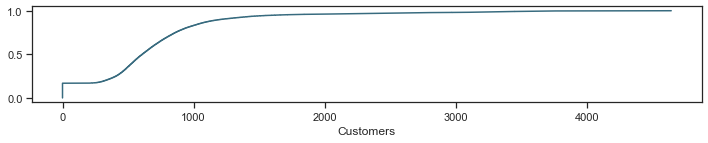

In [30]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(Store50['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Customers');

About 20-25% of the values are zero for customers.. May be the store was closed on that day


In [31]:
## Let us check if we have records where the store was open and customer count/foot-fall was zero

Store50[(Store50.Open == 1) & (Store50.Customers == 0)]


,Store,Day Of Week,Customers,Open,Promotion,State Holiday,School Holiday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-02-13,1047,4,0,1,0,0,0,2015,2,13,7
2015-12-02,1047,3,0,1,0,0,0,2015,12,2,49
2014-07-02,1011,4,0,1,1,0,0,2014,7,2,27


As such records are less and we do not know the specific reason why there was no customer even if store was open, we are not deleting such records.

In [32]:
Store50.isnull().sum()

Store             0
Day Of Week       0
Customers         0
Open              0
Promotion         0
State Holiday     0
School Holiday    0
Year              0
Month             0
Day               0
WeekOfYear        0
dtype: int64

No Missing Values are present in the data.

In [33]:
## Rename Columns to remove space

Store50.rename(columns = {"Day Of Week": "DayOfWeek", "State Holiday":"StateHoliday","School Holiday":"SchoolHoliday"}, 
                      inplace = True) 

In [34]:
Store50.head()

,Store,DayOfWeek,Customers,Open,Promotion,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2016-05-31,1044,1,884,1,1,0,0,2016,5,31,22
2016-05-31,1041,1,1032,1,1,0,1,2016,5,31,22
2016-05-31,1036,1,1070,1,1,0,0,2016,5,31,22
2016-05-31,1047,1,2043,1,1,0,0,2016,5,31,22
2016-05-31,1012,1,1239,1,1,0,0,2016,5,31,22


In [35]:
Store50.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43326 entries, 2016-05-31 to 2014-01-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          43326 non-null  int64 
 1   DayOfWeek      43326 non-null  int64 
 2   Customers      43326 non-null  int64 
 3   Open           43326 non-null  int64 
 4   Promotion      43326 non-null  int64 
 5   StateHoliday   43326 non-null  object
 6   SchoolHoliday  43326 non-null  int64 
 7   Year           43326 non-null  int64 
 8   Month          43326 non-null  int64 
 9   Day            43326 non-null  int64 
 10  WeekOfYear     43326 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 4.0+ MB


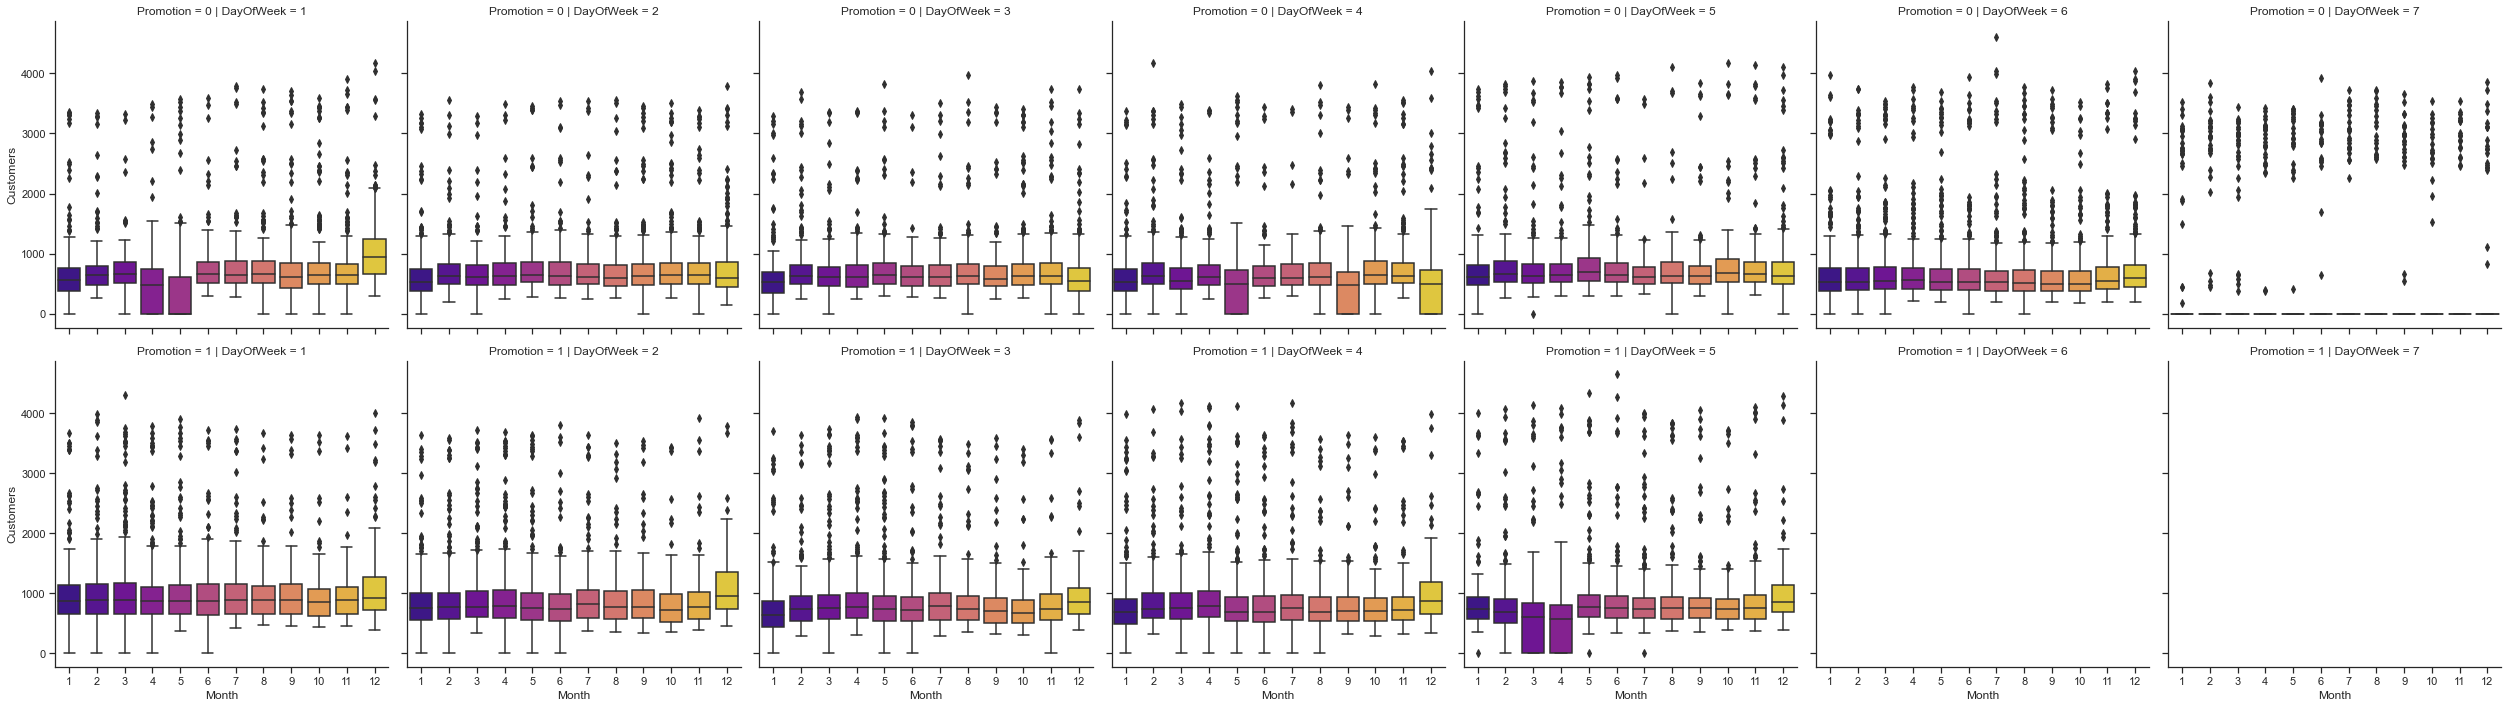

In [36]:
# Customer trends based on day of week and promotion
sns.catplot(data = Store50, x = 'Month', y = "Customers", 
               col = 'DayOfWeek', # Day of Week
               palette = 'plasma',
               row = 'Promotion', # per promotion in the store in rows
               kind = 'box', 
               color = c) 

plt.show()

Impact of the promotion is clearly visible even across month.. Day1 , Month 1, Promotion=1, customer count is high.. However for December, no impact of promotion.

In [37]:
## Let us check if we have stores which are open on Sundays

Store50[(Store50.Open == 1) & (Store50.DayOfWeek == 7)]['Store'].unique()

array([1011, 1016, 1015], dtype=int64)

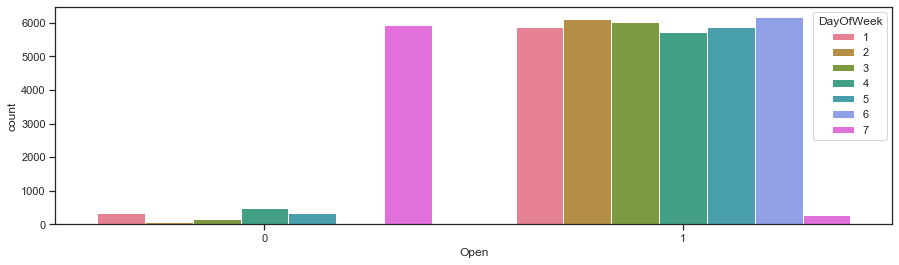

In [38]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=Store50,palette="husl", ax=axis1);

Even when the store was closed we see that the footfall count is high on Sunday
Even for other days when store was not open, the count of customers is not zero.

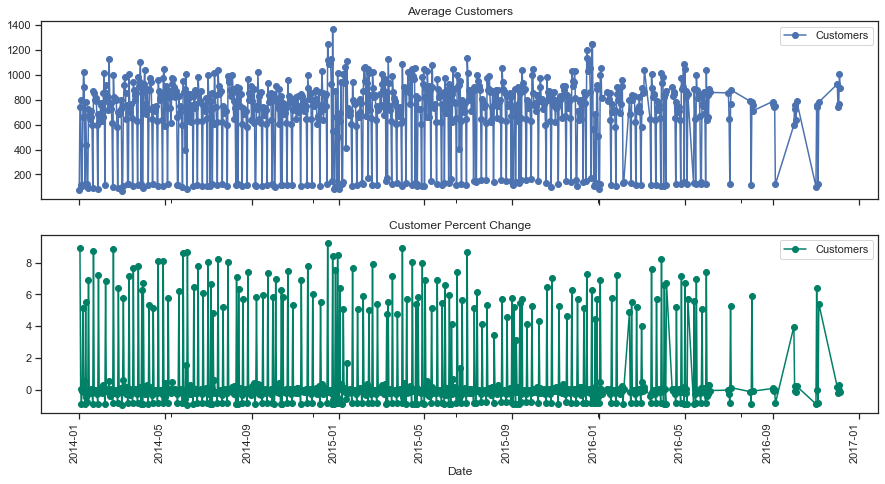

In [39]:
# group by date and get average Customers, and precent change
average_customers    = Store50.groupby('Date')["Customers"].mean()
pct_change_customers = Store50.groupby('Date')["Customers"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average_customers.plot(legend=True,ax=axis1,marker='o',title="Average Customers")
ax1.set_xticks(range(len(average_customers)))
ax1.set_xticklabels(average_customers.index.tolist(), rotation=90)
# plot precent change for Customers over time(year-month)
ax2 = pct_change_customers.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Customer Percent Change")


 Much of the variation is visible across specific days of the week and specific months in a year.

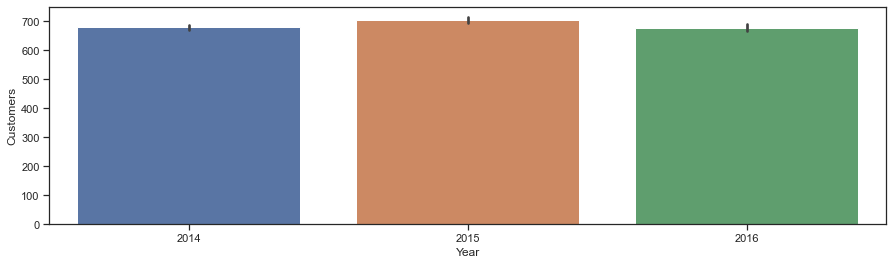

In [40]:
## Plot average customers for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x='Year', y='Customers', data=Store50, ax=axis1);

There is not much variation for the customer footfall per year.

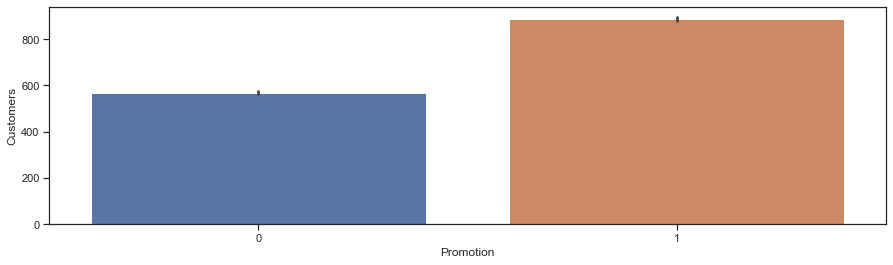

In [41]:
# Plot average customers with and without promo
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x='Promotion', y='Customers', data=Store50, ax=axis1);


Having a Promotion does have an impact on the customer count.

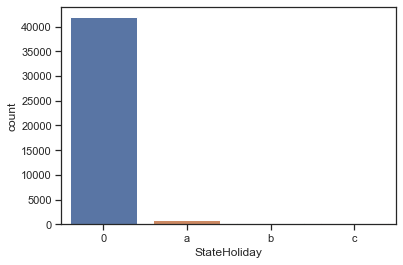

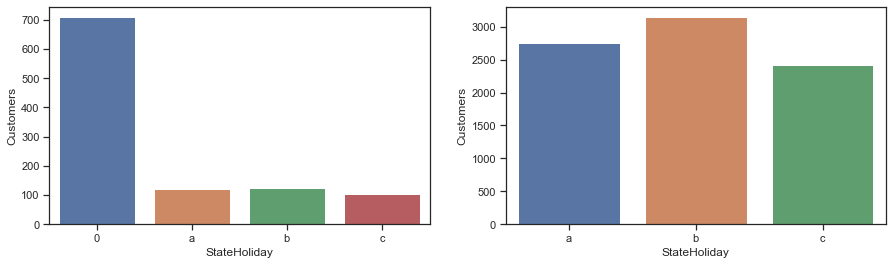

In [42]:
# StateHoliday

# StateHoliday column has values 0 & "0", So, we need to merge values with 0 to "0"
Store50["StateHoliday"].loc[Store50["StateHoliday"] == 0] = "0"

#Plotting the count of different types of State Holidays
sns.countplot(x='StateHoliday', data=Store50);

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

#Plotting a barplot of Customers with respect to different types of State Holiday
sns.barplot(x='StateHoliday', y='Customers', data=Store50, ax=axis1,ci=None);

#Plotting an instance when the State Holiday is not equal 0 but the Customer count is 0
mask = (Store50["StateHoliday"] != "0") & (Store50["Customers"] > 0)
sns.barplot(x='StateHoliday', y='Customers', data=Store50[mask], ax=axis2,ci=None);


Customer count is highest when Stateholiday=0.

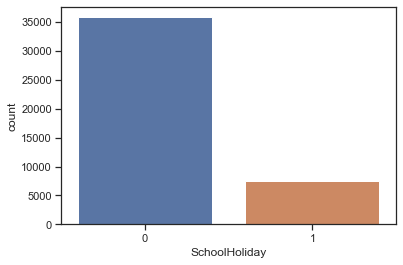

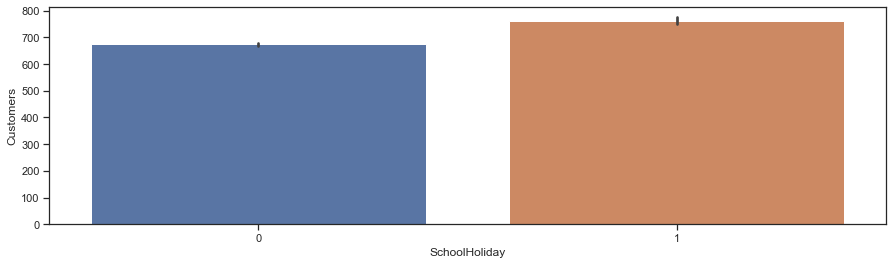

In [43]:
# SchoolHoliday

# Plotting the count of School Holidays
sns.countplot(x='SchoolHoliday', data=Store50);

fig, (axis1) = plt.subplots(1,figsize=(15,4))

#Plotting the average number of Customers with respect to the School Holiday
sns.barplot(x='SchoolHoliday', y='Customers', data=Store50, ax=axis1);


When there is a school holiday, the customer count is more.

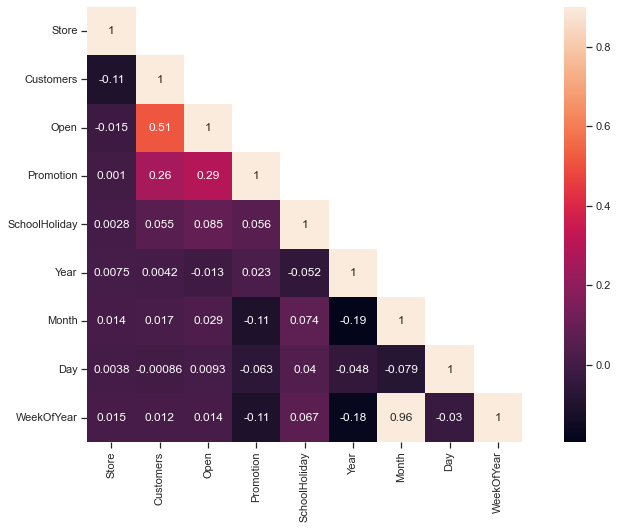

In [44]:
corr_all = Store50.drop('DayOfWeek', axis = 1).corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

Open and Customers are highly correlated - This was expected. Day of the week is dropped from this correlation plot as ideally Day of the Week is a categorical type of variable
Similarly Month, Day, Year should be read with respect to negative values, as these are being considered as integer wherein the values does not represent any kind of order

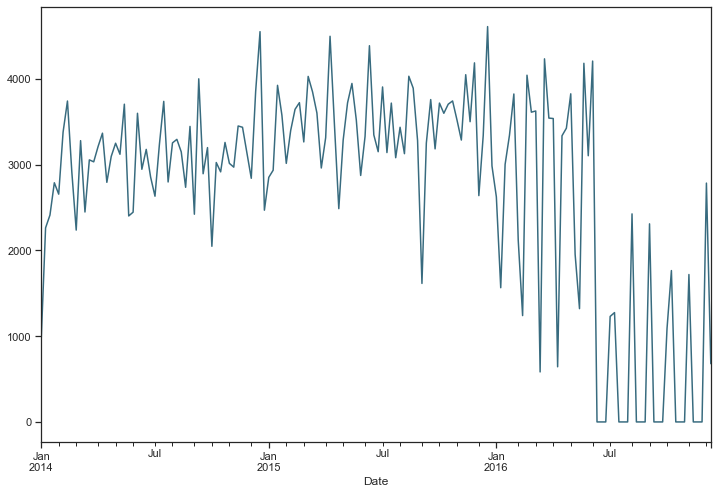

In [45]:
## We are considering the first store i.e. Store id = 1044

# store types
Store50_1044 = Store50[Store50.Store == 1044]['Customers']. sort_index(ascending=True)
f, (ax1) = plt.subplots(1, figsize = (12, 8))
Store50_1044.resample('W').sum().plot(color = c, ax = ax1)

plt.show()


Seasonality does exists in the data set. The store had a peak in December and May.

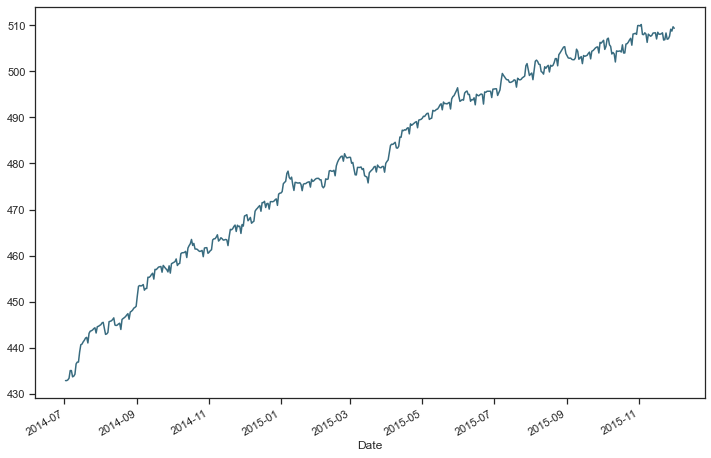

In [46]:
# Let's check the trend in the data set
decomposition_a = seasonal_decompose(Store50_1044, model = 'additive', freq = 365)
f, (ax1) = plt.subplots(1, figsize = (12, 8))
decomposition_a.trend.plot(color = c, ax = ax1)
plt.show()

There seems to be an increase in customer footfall year on year.

# END